In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv(r'C:\Users\Ochieng Fess\Fashion Supply Chain\data\supply_chain_data.csv')

## Preview Top five rows

In [3]:
data.head()

,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,...,Location,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs
0,haircare,SKU0,69.808006,55,802,8661.996792,Non-binary,58,7,96,...,Mumbai,29,215,29,46.279879,Pending,0.226410,Road,Route B,187.752075
1,skincare,SKU1,14.843523,95,736,7460.900065,Female,53,30,37,...,Mumbai,23,517,30,33.616769,Pending,4.854068,Road,Route B,503.065579
2,haircare,SKU2,11.319683,34,8,9577.749626,Unknown,1,10,88,...,Mumbai,12,971,27,30.688019,Pending,4.580593,Air,Route C,141.920282
3,skincare,SKU3,61.163343,68,83,7766.836426,Non-binary,23,13,59,...,Kolkata,24,937,18,35.624741,Fail,4.746649,Rail,Route A,254.776159
4,skincare,SKU4,4.805496,26,871,2686.505152,Non-binary,5,3,56,...,Delhi,5,414,3,92.065161,Fail,3.145580,Air,Route A,923.440632


## Preview bottom 5 rows

In [5]:
data.tail()

,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,...,Location,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs
95,haircare,SKU95,77.903927,65,672,7386.363944,Unknown,15,14,26,...,Mumbai,18,450,26,58.890686,Pending,1.210882,Air,Route A,778.864241
96,cosmetics,SKU96,24.423131,29,324,7698.424766,Non-binary,67,2,32,...,Mumbai,28,648,28,17.803756,Pending,3.872048,Road,Route A,188.742141
97,haircare,SKU97,3.526111,56,62,4370.916580,Male,46,19,4,...,Mumbai,10,535,13,65.765156,Fail,3.376238,Road,Route A,540.132423
98,skincare,SKU98,19.754605,43,913,8525.952560,Female,53,1,27,...,Chennai,28,581,9,5.604691,Pending,2.908122,Rail,Route A,882.198864
99,haircare,SKU99,68.517833,17,627,9185.185829,Unknown,55,8,59,...,Chennai,29,921,2,38.072899,Fail,0.346027,Rail,Route B,210.743009


## Quick statistics

In [18]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Price,100.0,49.462461,31.168193,1.699976,19.597823,51.239831,77.198228,99.171329
Availability,100.0,48.400000,30.743317,1.000000,22.750000,43.500000,75.000000,100.000000
Number of products sold,100.0,460.990000,303.780074,8.000000,184.250000,392.500000,704.250000,996.000000
Revenue generated,100.0,5776.048187,2732.841744,1061.618523,2812.847151,6006.352023,8253.976921,9866.465458
Stock levels,100.0,47.770000,31.369372,0.000000,16.750000,47.500000,73.000000,100.000000
Lead times,100.0,15.960000,8.785801,1.000000,8.000000,17.000000,24.000000,30.000000
Order quantities,100.0,49.220000,26.784429,1.000000,26.000000,52.000000,71.250000,96.000000
Shipping times,100.0,5.750000,2.724283,1.000000,3.750000,6.000000,8.000000,10.000000
Shipping costs,100.0,5.548149,2.651376,1.013487,3.540248,5.320534,7.601695,9.929816
Lead time,100.0,17.080000,8.846251,1.000000,10.000000,18.000000,25.000000,30.000000


## Top 10 Products by Revenue

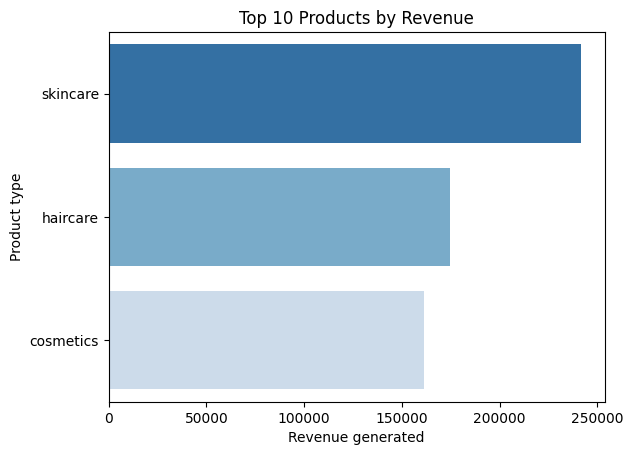

In [8]:
#group data by product type and calc revenue
product_revenue = data.groupby('Product type')['Revenue generated'].sum()
#sort in desc
product_revenue = product_revenue.sort_values(ascending=False)
#plot bar chart
sns.barplot(x=product_revenue[:10], y=product_revenue[:10].index, palette='Blues_r')
plt.title('Top 10 Products by Revenue')
plt.show()

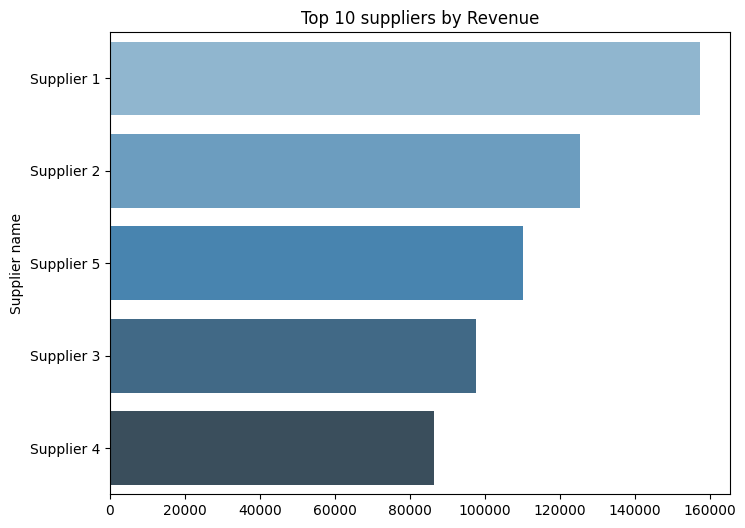

In [9]:
#Top 10 suppliers by Revenue
plt.figure(figsize=(8,6))
top_suppliers = data.groupby('Supplier name')['Revenue generated'].sum().nlargest(10)
sns.barplot(x=top_suppliers.values, y=top_suppliers.index, palette='Blues_d')
plt.title('Top 10 suppliers by Revenue')
plt.show()

## Products Count

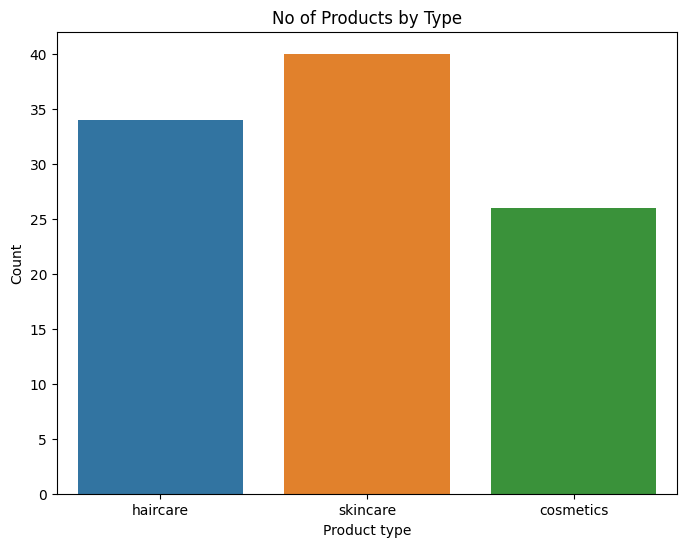

In [10]:
#Bar plot for product Type count
plt.figure(figsize=(8,6))
sns.countplot(data, x='Product type')
plt.xlabel('Product type')
plt.ylabel('Count')
plt.title('No of Products by Type')
plt.show()

## Shipping Costs by Transport Modes

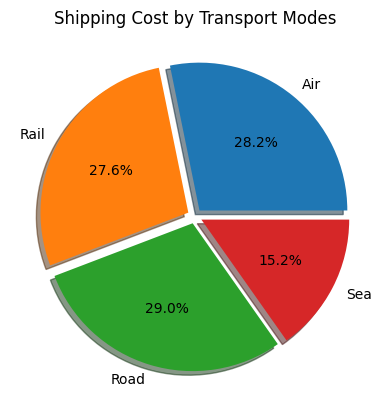

In [27]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Group by transportation mode and calculate shipping cost
transportation_costs = data.groupby('Transportation modes')['Shipping costs'].sum()

# Create a 3D pie chart
fig = plt.figure()
ax = fig.add_subplot(111)#single plot shorthand

# Pie chart parameters
explode = [0.05,0.05,0.05,0.05] # add some separation

# Plot the 3D pie chart
ax.pie(transportation_costs, labels=transportation_costs.index, autopct='%1.1f%%', explode=explode, shadow=True)

# Set title
plt.title('Shipping Cost by Transport Modes')

# Show the 3D pie chart
plt.show()


## Product Types by Customer Demographic 

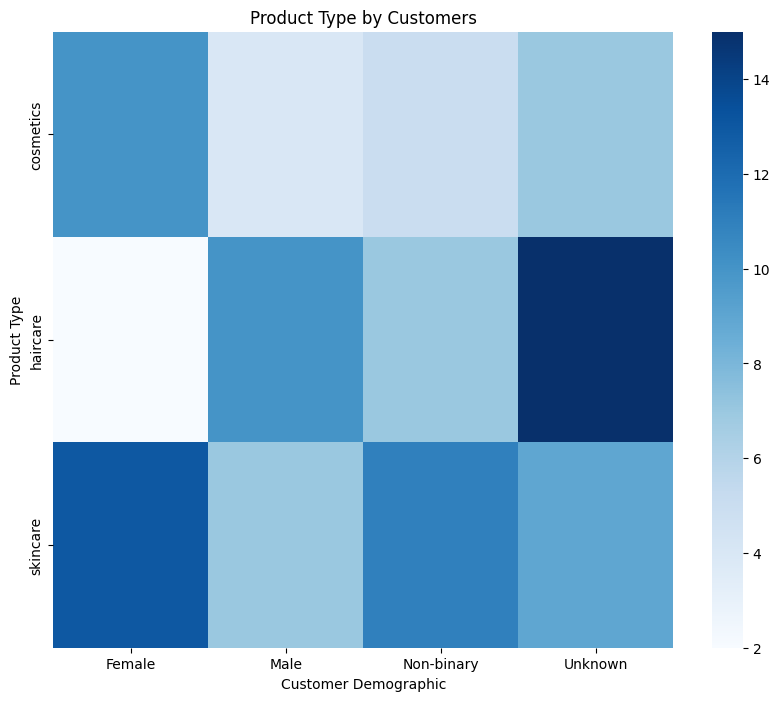

In [12]:
#Heatmap of customer demographics
plt.figure(figsize=(10,8))
sns.heatmap(pd.crosstab(data['Product type'], data['Customer demographics']), cmap='Blues')
plt.xlabel('Customer Demographic')
plt.ylabel('Product Type')
plt.title('Product Type by Customers')
plt.show()

## Products consumption by City

<Figure size 1000x800 with 0 Axes>

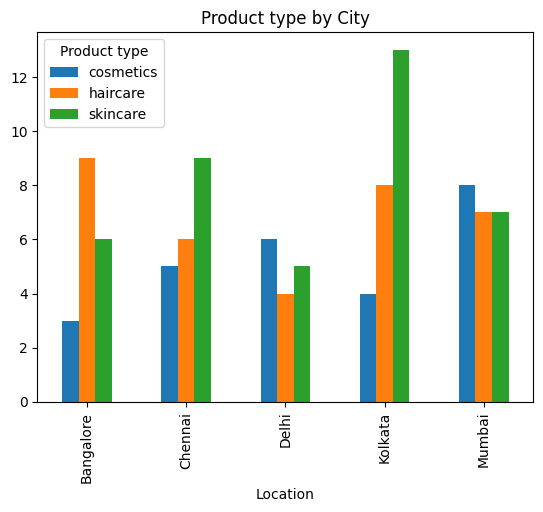

In [13]:
#Bar chart of product type by City
plt.figure(figsize=(10,8))
pd.crosstab(data['Location'], data['Product type']).plot(kind='bar', stacked=False)
plt.title('Product type by City')
plt.show()

## Product's Lead Times

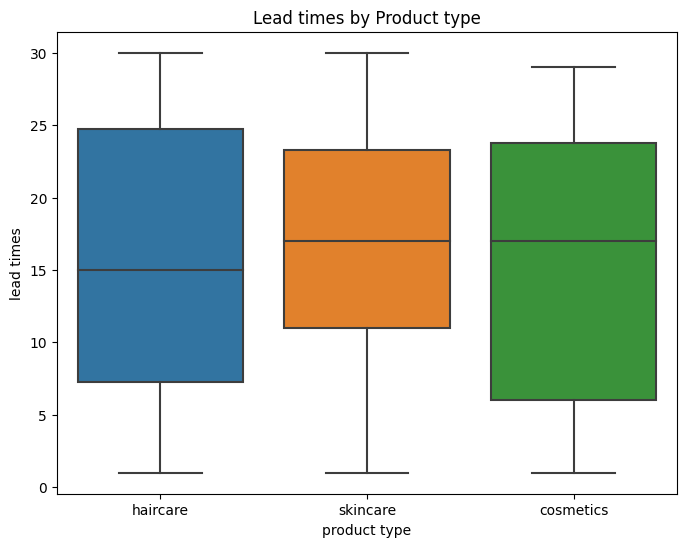

In [14]:
plt.figure(figsize=(8,6))
sns.boxplot(data, x='Product type', y='Lead times')
plt.xlabel('product type')
plt.ylabel('lead times')
plt.title('Lead times by Product type')
plt.show()

## Product Price distribution

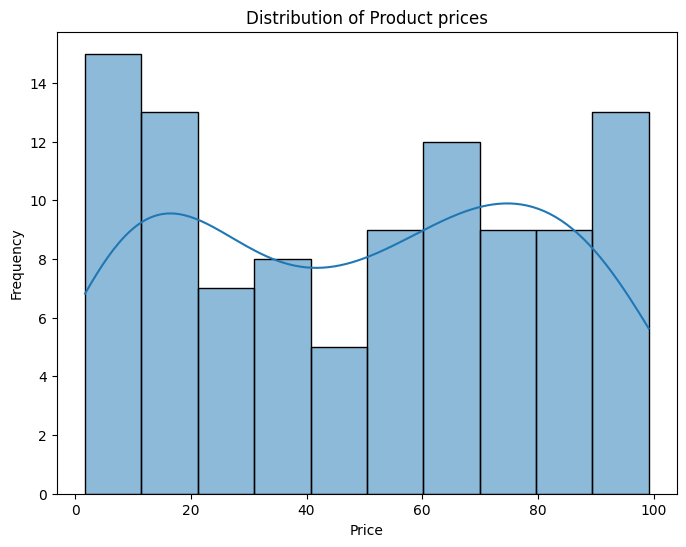

In [15]:
plt.figure(figsize=(8,6))
sns.histplot(data, x='Price', kde=True, bins=10)
plt.title('Distribution of Product prices')
plt.ylabel('Frequency')
plt.show()

In [16]:
#Findings

In [17]:
''' 
1.Skincare products generates more revenue ($200K+)
2.(140K+) worth of revenue is generated from supplier1(Top supplier by revenue generation)
3.Most products are Skincare (40 unique entries) followed by haircare(34 unique entries).
4.Sea transport has the least shipping cost
5.Skincare products are in demand followed by cosmetics among female customers.
6.Haircare products are in relatively in demand followed by skincare among Male customers
7.Skincare in Kolkata city is in high demand
8.Cosmetics has the lowest demand in Bangalore city.
'''

' \n1.Skincare products generates more revenue ($200K+)\n2.(140K+) worth of revenue is generated from supplier1(Top supplier by revenue generation)\n3.Most products are Skincare (40 unique entries) followed by haircare(34 unique entries).\n4.Sea transport has the least shipping cost\n5.Skincare products are in demand followed by cosmetics among female customers.\n6.Haircare products are in relatively in demand followed by skincare among Male customers\n7.Skincare in Kolkata city is in high demand\n8.Cosmetics has the lowest demand in Bangalore city.\n'